# Load data and check for missing values and duplicates

In [4]:
import pandas as pd

file_path = '/Users/taief/Desktop/MUSIC REC/data/data_by_artist.csv'
data_by_artist = pd.read_csv(file_path)
data_by_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


# Data Exploration

In [5]:
#check for missing values
print(data_by_artist.isnull().sum())
#check for duplicates
duplicates = data_by_artist.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
# check missing rows
missing_rows = data_by_artist.isnull().sum()
print(f"Number of missing rows: {missing_rows.sum()}")

mode                0
count               0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64
Number of duplicate rows: 0
Number of missing rows: 0


# Data Preprocessing

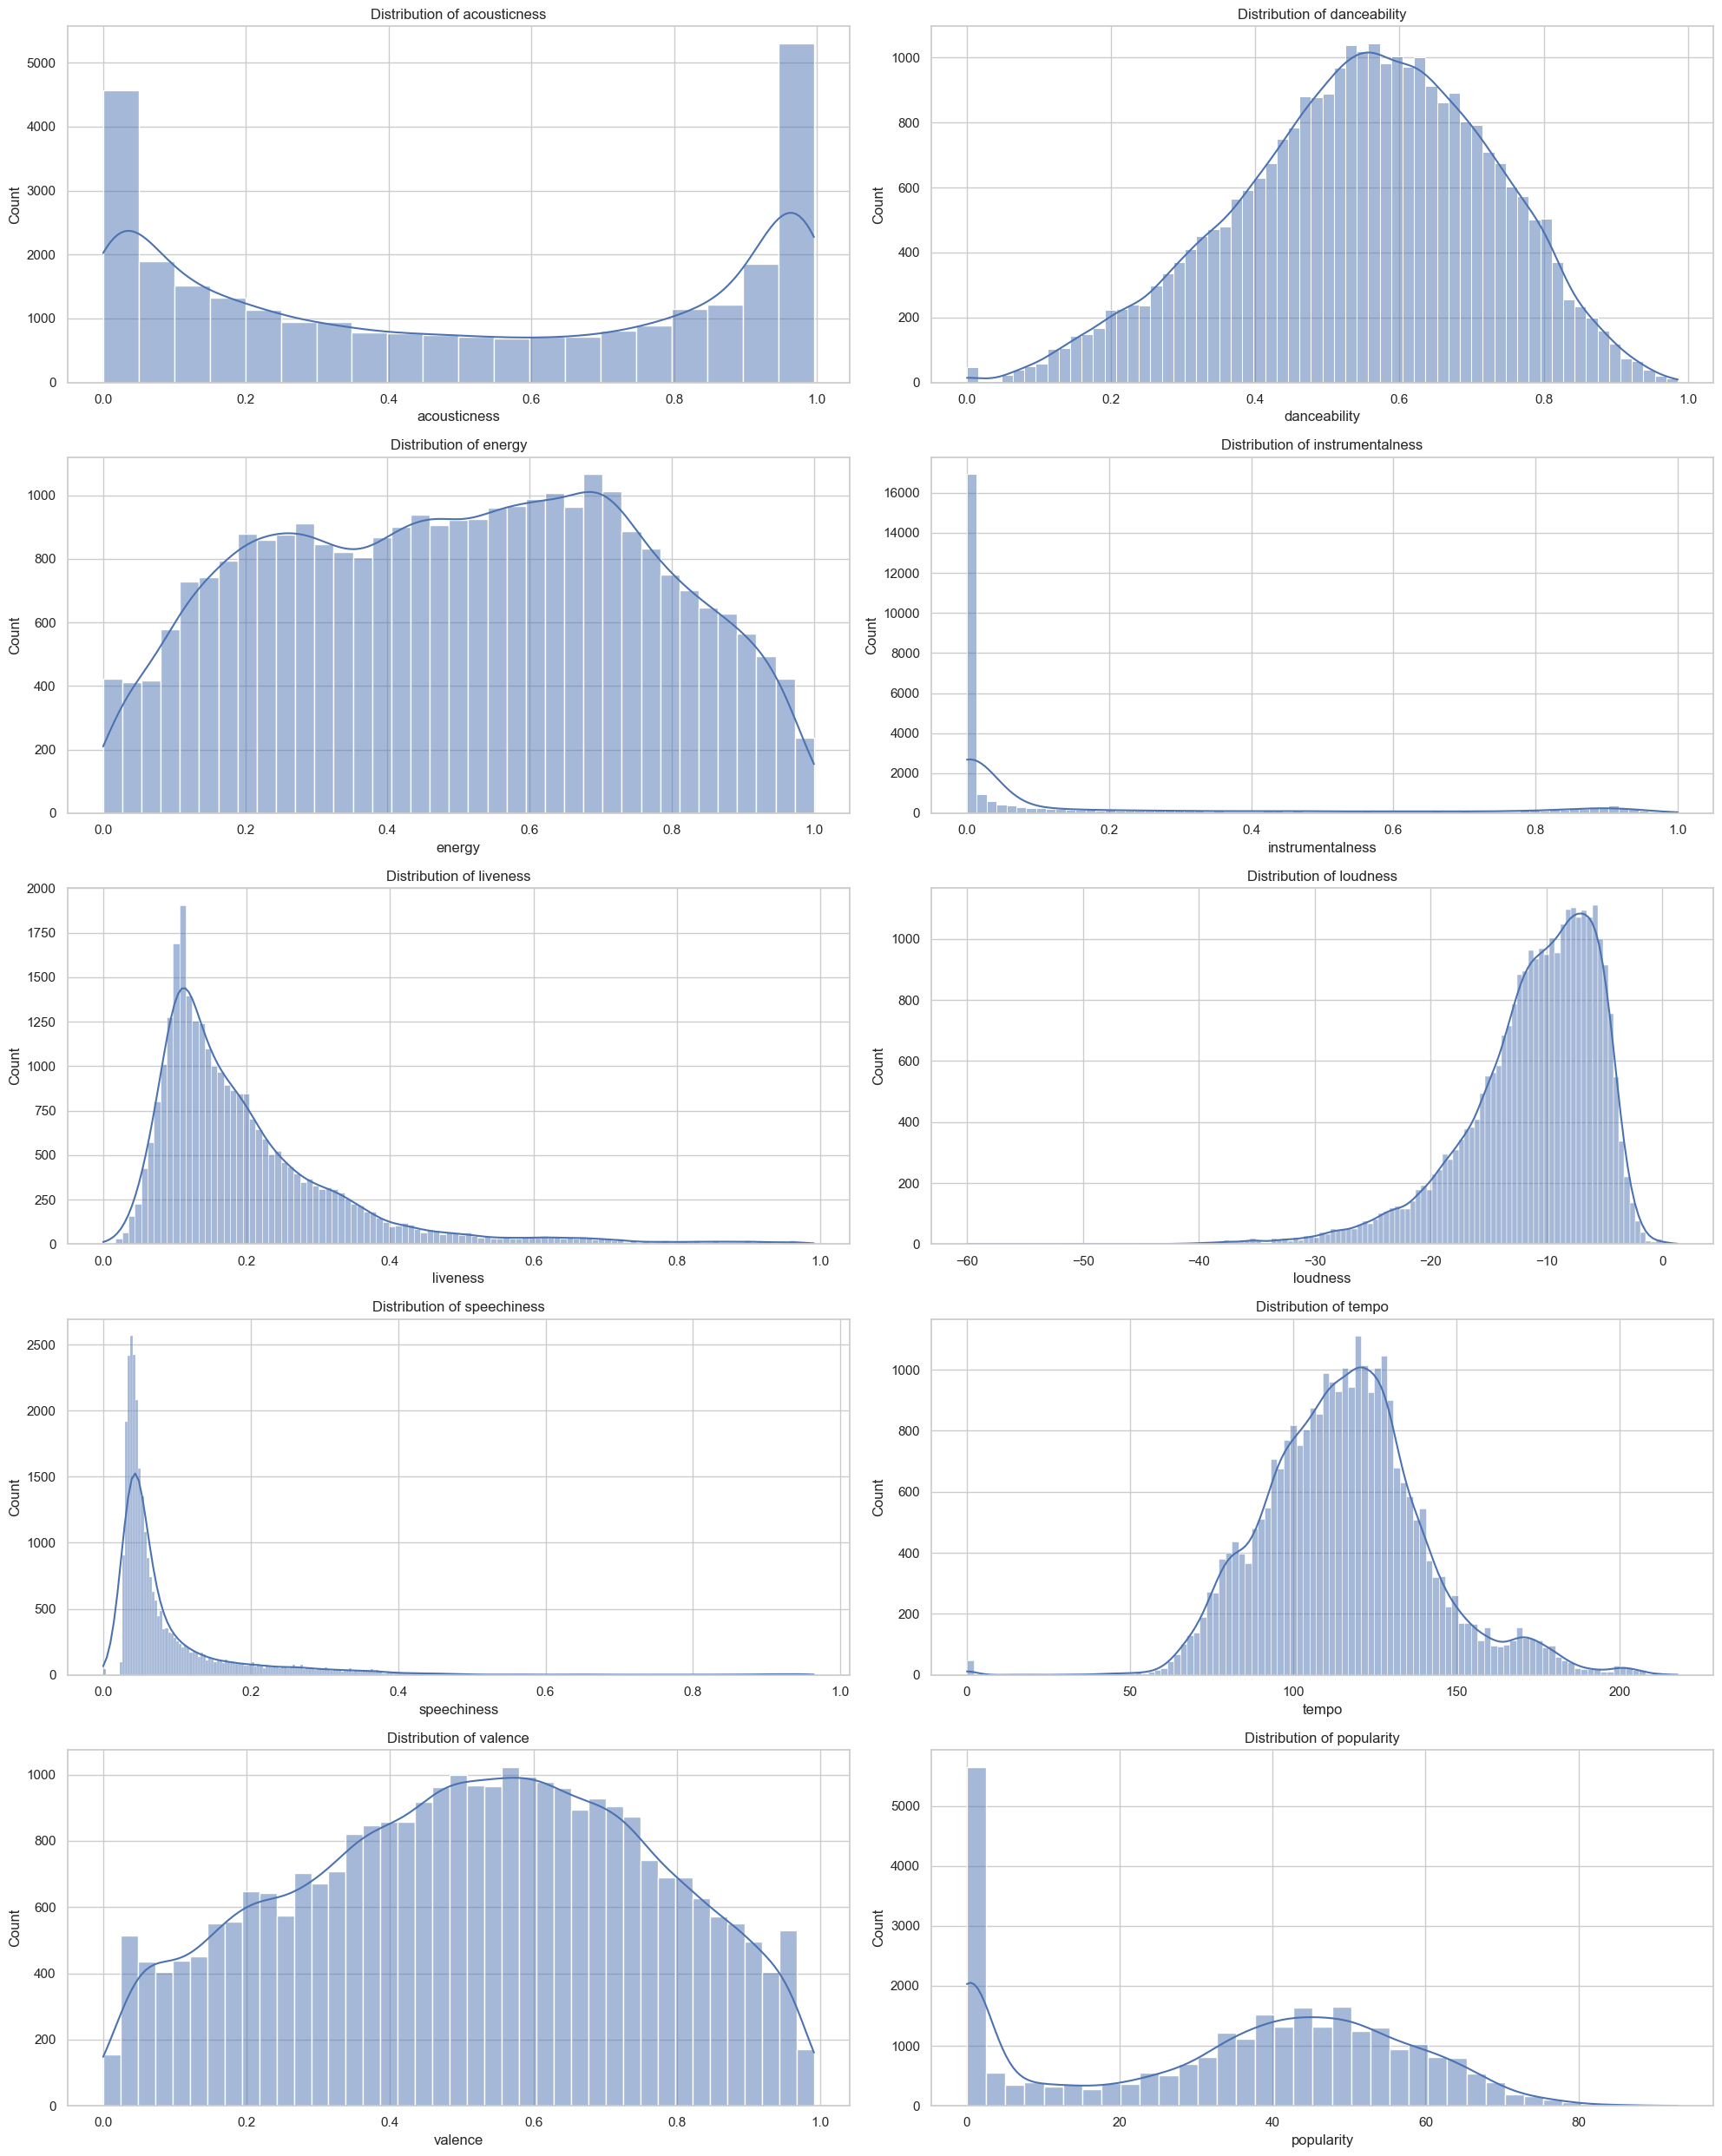

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visual style for plots
sns.set(style="whitegrid")

# List of features to plot
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Plotting distributions
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
for i, feature in enumerate(features):
    sns.histplot(data=data_by_artist[feature], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
plt.tight_layout()

# save plot in plot folder with name distribution_of_features.png
plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/distribution_of_features_artist.png')

# Descriptive statistics of the data_artist

In [7]:
# Descriptive statistics
descriptive_stats = data_by_artist.describe()
print(descriptive_stats)

               mode         count  acousticness  danceability   duration_ms  \
count  28680.000000  28680.000000  28680.000000  28680.000000  2.868000e+04   
mean       0.759170     13.847211      0.498373      0.546490  2.388780e+05   
std        0.427595     53.372544      0.370614      0.176474  1.211318e+05   
min        0.000000      1.000000      0.000000      0.000000  1.879550e+04   
25%        1.000000      2.000000      0.122296      0.431000  1.823304e+05   
50%        1.000000      3.000000      0.478458      0.557000  2.186400e+05   
75%        1.000000      8.000000      0.896000      0.675000  2.684670e+05   
max        1.000000   3169.000000      0.996000      0.986000  5.403500e+06   

             energy  instrumentalness      liveness      loudness  \
count  28680.000000      28680.000000  28680.000000  28680.000000   
mean       0.497488          0.174756      0.202441    -11.140498   
std        0.254885          0.298406      0.140884      5.771749   
min        0

# Correlation Matrix for Selected Features

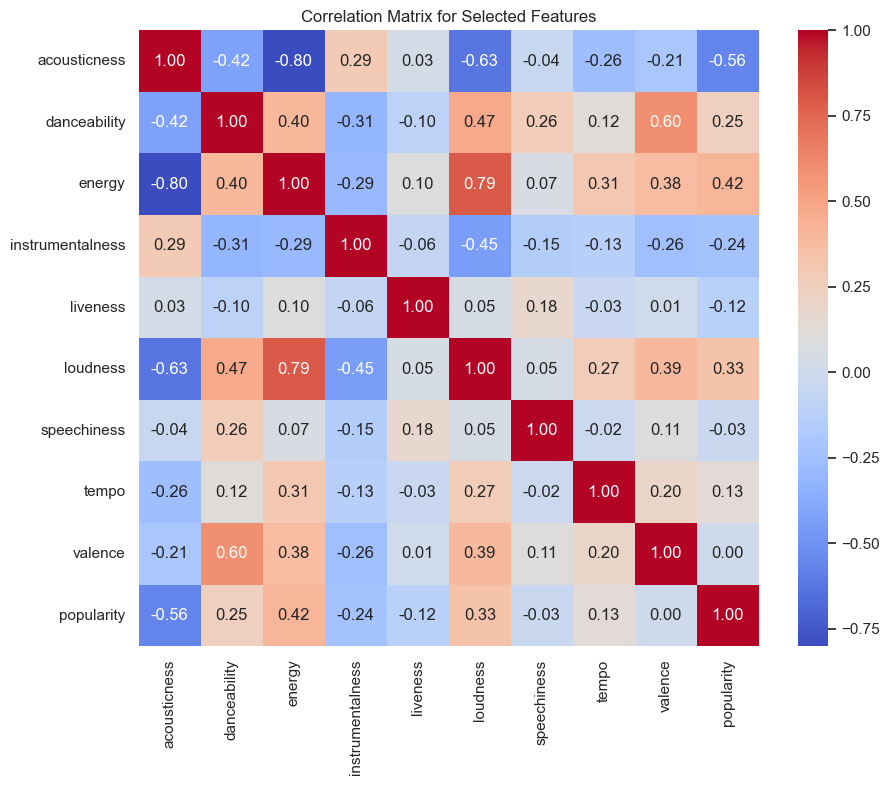

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Select only the specified features from the DataFrame
features_data = data_by_artist[features]

# Compute the correlation matrix
correlation_matrix = features_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()


Acousticness:

Has a strong negative correlation with energy (-0.80), indicating that songs that are more acoustic tend to be less energetic.
It is moderately negatively correlated with loudness (-0.63) and popularity (-0.56), suggesting that more acoustic tracks are generally quieter and less popular.
Danceability:

Shows a moderate positive correlation with valence (0.60), suggesting that songs that are more danceable tend to be more positive or happier.
It has a moderate positive correlation with energy (0.40) and a weaker positive correlation with popularity (0.25).
Energy:

Has a strong positive correlation with loudness (0.79), indicating that more energetic songs are usually louder.
It is moderately positively correlated with popularity (0.42).
Instrumentalness:

Shows a negative correlation with loudness (-0.45), meaning instrumental tracks might be quieter.
It has a very weak positive correlation with acousticness (0.29).
Liveness:

Does not have strong correlations with any of the other features, indicating it doesn't have a strong linear relationship with them.
Loudness:

As mentioned, it is strongly positively correlated with energy (0.79) and has a moderate positive correlation with danceability (0.47).
Speechiness:

Has no strong correlations with other features, suggesting that the presence of spoken words in tracks doesn't have a strong linear relationship with the other measured attributes.
Tempo:

Has very weak correlations with all other features, indicating its changes are relatively independent of other attributes.
Valence:

Moderately positively correlated with danceability (0.60) and has a weak positive correlation with energy (0.38).
Popularity:

Shows a moderate positive correlation with energy (0.42) and a weak positive correlation with danceability (0.25).


# Standardize the features for K-Means and PCA


In [63]:
from sklearn.preprocessing import StandardScaler

# feature selection for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = data_by_artist[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
# PCA

from sklearn.decomposition import PCA

# Keep 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Number of components PCA chose after fitting the data
n_pca_components = X_pca.shape[1]
print(f"PCA optimal {n_pca_components}")

# print variance explained by each component
print(pca.explained_variance_ratio_)

# get the eigenvectors of the covariance matrix
loadings = (pca.components_)

# Create a DataFrame with the loadings and the feature names for better interpretability

loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=features)

print(loadings_df)

PCA optimal 7
[0.38302141 0.13959455 0.12280612 0.09594021 0.08702602 0.0863642
 0.04024316]
                       PC1       PC2       PC3       PC4       PC5       PC6  \
acousticness      0.422632  0.266352 -0.170719  0.251674 -0.274129 -0.126102   
danceability     -0.376772  0.275070 -0.430191 -0.046869 -0.000243  0.180746   
energy           -0.466104 -0.189751  0.245000 -0.114709  0.078057  0.218187   
instrumentalness  0.290445 -0.203384 -0.030725  0.152198  0.228299  0.865929   
liveness         -0.021129  0.389263  0.735525  0.182819 -0.394916  0.203357   
loudness         -0.463839 -0.116872  0.133691 -0.148955 -0.081316 -0.032165   
speechiness      -0.101156  0.679322  0.069290  0.084289  0.667820 -0.011365   
tempo            -0.214095 -0.299318  0.055136  0.868944  0.205622 -0.208788   
valence          -0.325809  0.244475 -0.397631  0.283484 -0.464547  0.260537   

                       PC7  
acousticness     -0.369253  
danceability      0.611959  
energy           -0

PC1:

Strong negative loadings on energy (-0.466104) and loudness (-0.463839), and a positive loading on acousticness (0.422632).
This component might represent a contrast between acoustic and electronic music, where high values might indicate more acoustic tracks, and low values more energetic and louder tracks.
PC2:

High positive loading for speechiness (0.679322), suggesting this component measures the presence of spoken words in a track.
Positive loadings for danceability and valence, and negative for tempo, may indicate this component captures a dimension related to rhythmic and vocal content in music.
PC3:

Strong positive loading on liveness (0.735525), which may indicate this component measures the live concert-like feel of music.
Negative loadings on danceability and valence suggest that this live dimension is inversely related to the danceability and happiness of the music.
PC4:

Dominated by a positive loading on tempo (0.868944), indicating that this component is heavily influenced by the speed of the music.
It could be capturing the aspect of music that varies with the speed at which it is played.
PC5:

High positive loading on speechiness (0.667820), but also a significant negative loading on liveness (-0.394916).
This component may be distinguishing between tracks that have a lot of spoken content but are not live performances.
PC6:

Very high positive loading on instrumentalness (0.865929), suggesting this component reflects the degree to which music is instrumental versus vocal.
Other features have lesser influence on this component.
PC7:

The highest positive loading is danceability (0.611959), and there are moderate negative loadings on loudness (-0.402674) and valence (-0.323638).
This component might capture a dimension of music that contrasts danceable aspects with loudness and positive mood.

# how much we can reduce the dimensionality of our data while still keeping most of the information.

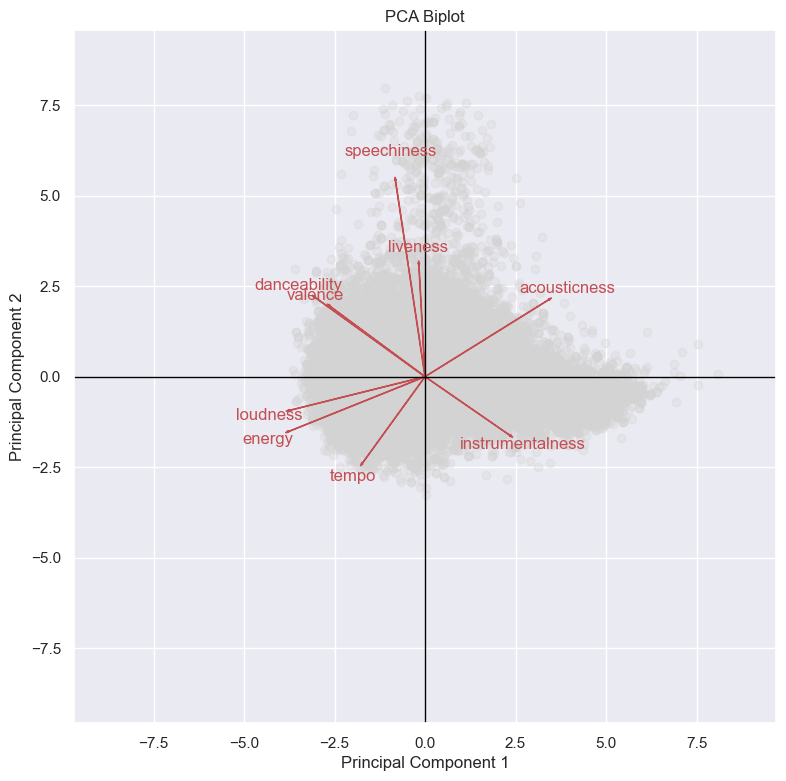

In [65]:
import matplotlib.pyplot as plt
import numpy as np

loadings2 = pca.components_[:2].T

loadings_df2 = pd.DataFrame(loadings2, columns=['PC1', 'PC2'], index=features)

# create the biplot
plt.figure(figsize=(12, 9))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, color='lightgrey')  

# Determine the maximum range of PCA scores
x_max, y_max = np.max(np.abs(X_pca[:, 0])), np.max(np.abs(X_pca[:, 1]))

# Plot each feature as a quiver plot (arrow) from the origin to the coordinate of the feature for the first two principal components (PC1 and PC2)
for i in range(loadings_df2.shape[0]):
    plt.arrow(0, 0,
              loadings_df2.iloc[i, 0] * x_max,  # Use .iloc here
              loadings_df2.iloc[i, 1] * y_max,  # Use .iloc here
              color='r', width=0.01, head_width=0.05, head_length=0.1, overhang=0.2)
    plt.text(loadings_df2.iloc[i, 0] * x_max * 1.15,  # Use .iloc here
             loadings_df2.iloc[i, 1] * y_max * 1.15,  # Use .iloc here
             loadings_df2.index[i], color='r', ha='center', va='center')

# Set limits for the plot
plt.xlim(-x_max*1.2, x_max*1.2)
plt.ylim(-y_max*1.2, y_max*1.2)

# Add labels and a title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Add gridlines for better readability
plt.grid(True)

# Add horizontal and vertical lines through the origin color them red for better readability
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Show the plot
plt.show()


The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

For n_clusters = 2, the silhouette score is: 0.2807957065810884
For n_clusters = 3, the silhouette score is: 0.21043970452045505
For n_clusters = 4, the silhouette score is: 0.20106250105300927
For n_clusters = 5, the silhouette score is: 0.207326580010617
For n_clusters = 6, the silhouette score is: 0.21772501711038583
For n_clusters = 7, the silhouette score is: 0.1818861214927509
For n_clusters = 8, the silhouette score is: 0.17593688554346656
For n_clusters = 9, the silhouette score is: 0.18480148266044674
For n_clusters = 10, the silhouette score is: 0.18566604393934147


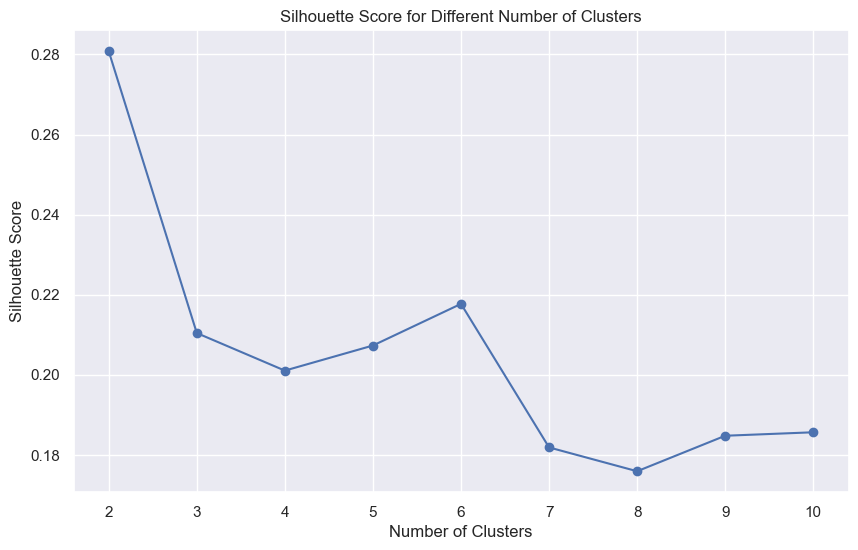

The optimal number of clusters is: 2


In [66]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of possible clusters to evaluate
range_n_clusters = list(range(2, 11))

silhouette_scores = []  # To store silhouette scores for each n_clusters

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)  # Use PCA-reduced data
    
    # Calculate the silhouette score and append to list
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_clusters}")


In [67]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Assuming you have the PCA-reduced data X_pca and cluster labels cluster_labels

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)
print(f'Davies-Bouldin Index: {davies_bouldin}')


Calinski-Harabasz Index: 5210.81961217581
Davies-Bouldin Index: 1.4011218787883593


Calinski-Harabasz Index: A higher value generally indicates that the clusters are dense and well-separated, which is better.
Davies-Bouldin Index: A lower value indicates better separation between the clusters. Values closer to zero are better. 

# KMeans Clustering with 6 clusters

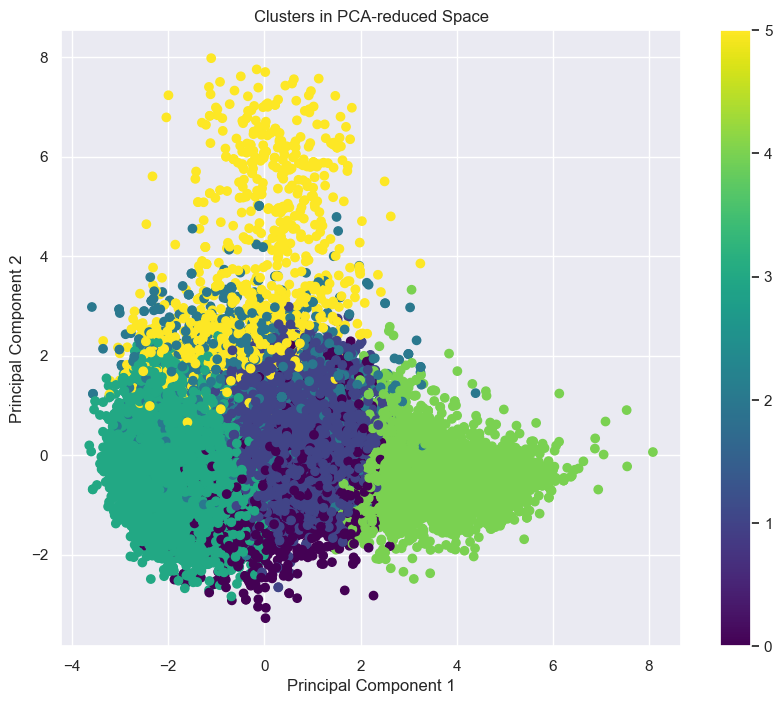

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.532320      0.564161  0.520437          0.740933  0.175919   
1            0.754872      0.520255  0.339041          0.058128  0.183667   
2            0.498756      0.512784  0.591677          0.119652  0.619596   
3            0.179052      0.635325  0.704648          0.035010  0.172589   
4            0.909414      0.297586  0.150858          0.524552  0.171389   
5            0.580877      0.674500  0.448279          0.042540  0.265406   

          loudness  speechiness       tempo   valence  
cluster                                                
0       -11.637975     0.065473  121.179630  0.564221  
1       -12.374175     0.066140  113.121311  0.508723  
2       -10.018757     0.114124  115.947417  0.539277  
3        -7.139733     0.091676  123.314076  0.603359  
4       -20.533287     0.050468   97.505183  0.

In [68]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Choose the optimal number of clusters from silhouette analysis
optimal_num_clusters = 6

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Clusters in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Profile the clusters

data_by_artist['cluster'] = cluster_labels  # add the cluster labels to your original dataset
cluster_profile = data_by_artist.groupby('cluster')[features].mean()  # calculate the mean of each feature for each cluster
print(cluster_profile)



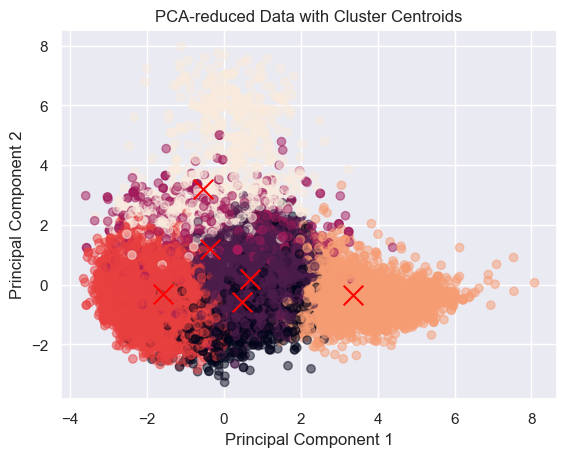

In [69]:
# Get centroids and plot them
centroids = kmeans.cluster_centers_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, alpha=0.5)  # The existing plot
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')  # Centroids
plt.title('PCA-reduced Data with Cluster Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


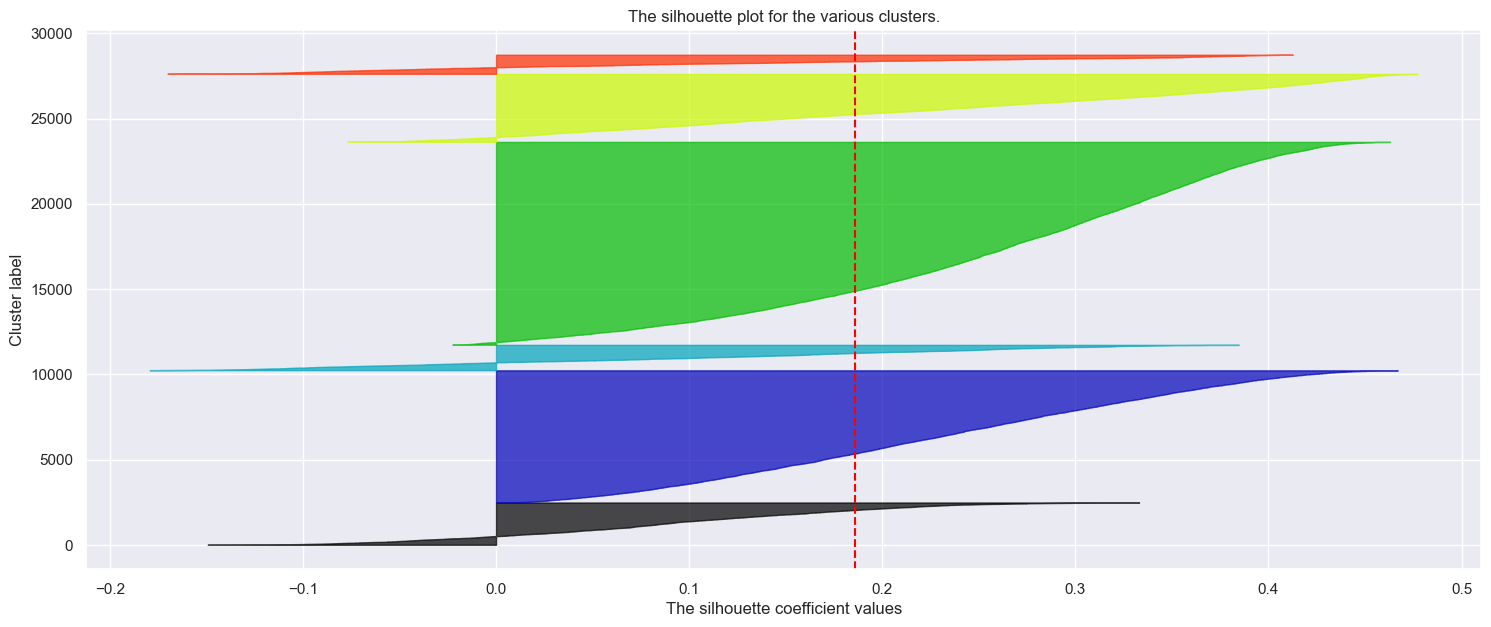

In [70]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Assuming silhouette_scores and cluster_labels are already computed

# Compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

y_lower = 10
for i in range(optimal_num_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / optimal_num_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


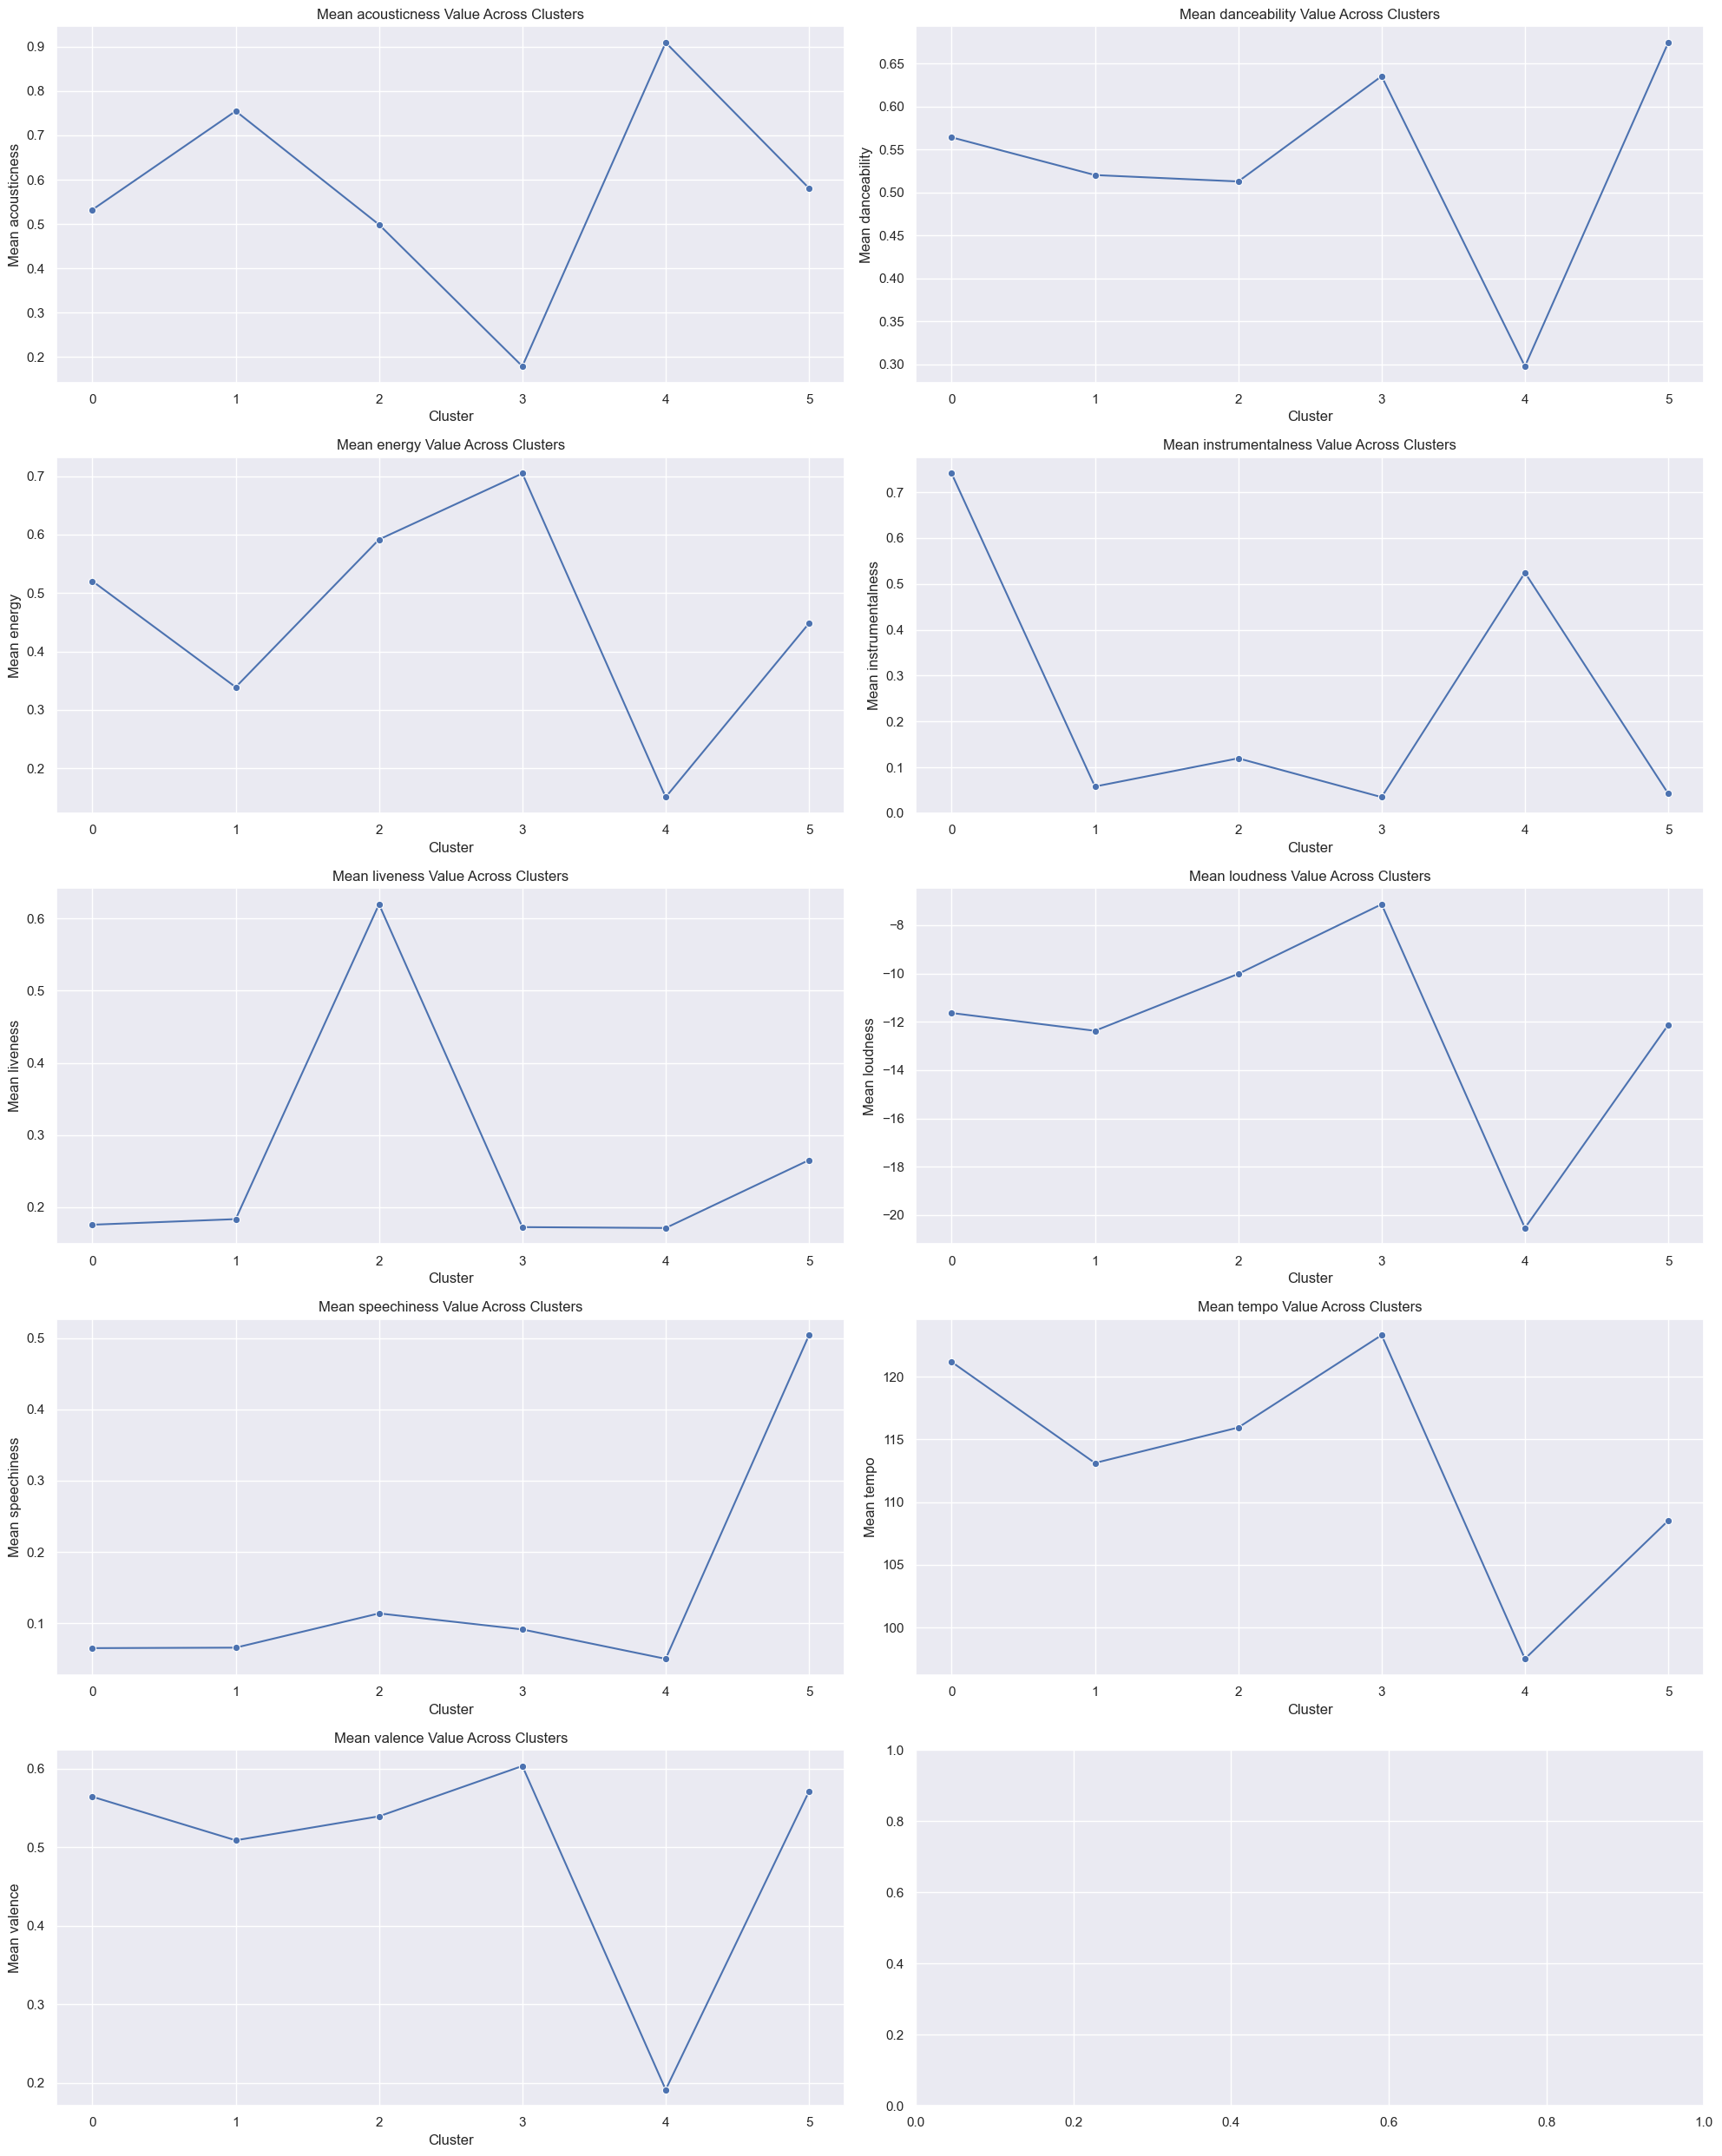

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot layout
n_rows = len(features) // 2 + len(features) % 2
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each feature to create a line plot for each
for i, feature in enumerate(features):
    # Create a new dataframe with the mean values of the feature for each cluster
    feature_means = data_by_artist.groupby('cluster')[feature].mean().reset_index()
    sns.lineplot(data=feature_means, x='cluster', y=feature, ax=axes[i], marker='o')
    axes[i].set_title(f'Mean {feature} Value Across Clusters')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(f'Mean {feature}')
    
# Adjust the layout
plt.tight_layout()
plt.show()




In [72]:
# automated cluster labeling
# Calculate the mean of each feature for each cluster

cluster_means = data_by_artist.groupby('cluster')[features].mean()

# Now, Normalize the feature values within each cluster and generate labels
feature_importance = cluster_means.apply(lambda row: row / row.sum(), axis=1)

for index, row in feature_importance.iterrows():
    top_features = row.sort_values(ascending=False).head(2).index.tolist()
    label = ' / '.join(top_features)
    print(f"Cluster {index} label suggestion: {label}")


Cluster 0 label suggestion: tempo / instrumentalness
Cluster 1 label suggestion: tempo / acousticness
Cluster 2 label suggestion: tempo / liveness
Cluster 3 label suggestion: tempo / energy
Cluster 4 label suggestion: tempo / acousticness
Cluster 5 label suggestion: tempo / danceability


In [73]:
# Calculate the mean of each feature within each cluster
cluster_means = data_by_artist.groupby('cluster')[features].mean()

# Normalize the feature values within each cluster
feature_importance = cluster_means.apply(lambda row: row / row.sum(), axis=1)

# Suggest labels by considering the second and third most defining features
for index, row in feature_importance.iterrows():
    # Sort the features by importance and select the top ones, excluding 'tempo'
    sorted_features = row.drop('tempo').sort_values(ascending=False)
    top_features = sorted_features.head(2).index.tolist()
    label = ' / '.join(top_features)
    print(f"Cluster {index} label suggestion: {label}")


Cluster 0 label suggestion: instrumentalness / valence
Cluster 1 label suggestion: acousticness / danceability
Cluster 2 label suggestion: liveness / energy
Cluster 3 label suggestion: energy / danceability
Cluster 4 label suggestion: acousticness / instrumentalness
Cluster 5 label suggestion: danceability / acousticness


Cluster 0 - "Instrumentalness / Valence": This cluster likely includes instrumental music that spans a range of moods (valence). It could encompass everything from upbeat jazz to calming classical pieces.

Cluster 1 - "Acousticness / Danceability": This suggests music that combines acoustic elements with a rhythm that's conducive to dancing. This could include genres like folk-pop, acoustic covers of dance hits, or even some types of world music.

Cluster 2 - "Liveness / Energy": Music in this cluster probably has a live recording feel and high energy, suggesting live performances that capture the excitement of the audience, such as rock concerts, live electronic sets, or dynamic jazz performances.

Cluster 3 - "Energy / Danceability": This cluster is characterized by high-energy, danceable music, indicating genres like electronic dance music (EDM), pop, and upbeat hip-hop or R&B.

Cluster 4 - "Acousticness / Instrumentalness": This cluster represents music that is both acoustic and instrumental, suggesting genres such as classical, acoustic jazz, folk instrumental, or ambient music.

Cluster 5 - "Danceability / Acousticness": The combination of danceability with acousticness in this cluster points to music that's suitable for dancing but has a significant acoustic component. This might include acoustic versions of popular dance tracks, certain types of world music with an emphasis on acoustic instruments, or upbeat indie/folk music.

In [74]:
import pandas as pd

# Define your cluster labels based on the discussion
cluster_labels = {
    0: "Instrumentalness / Valence",
    1: "Acousticness / Danceability",
    2: "Liveness / Energy",
    3: "Energy / Danceability",
    4: "Acousticness / Instrumentalness",
    5: "Danceability / Acousticness"
}

# Map the cluster numbers to the descriptive labels
data_by_artist['cluster_label'] = data_by_artist['cluster'].map(cluster_labels)


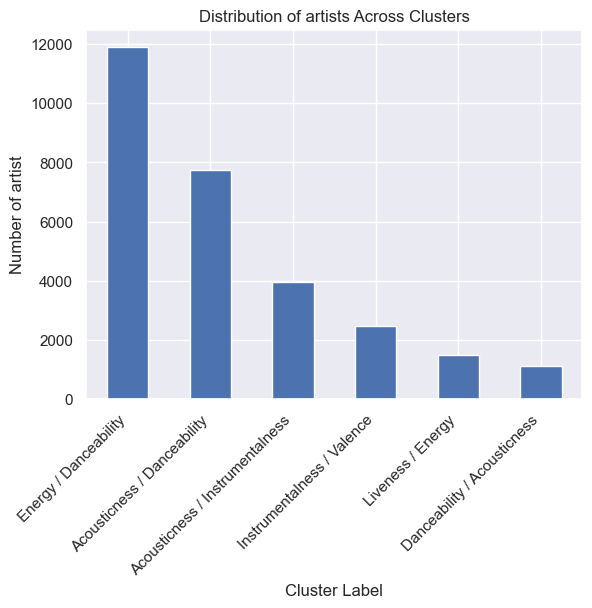

In [77]:
cluster_distribution = data_by_artist['cluster_label'].value_counts()

# Plotting the distribution
import matplotlib.pyplot as plt

cluster_distribution.plot(kind='bar')
plt.title('Distribution of artists Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of artist')
plt.xticks(rotation=45, ha="right")
plt.show()


In [76]:
import pandas as pd
import numpy as np

def recommend_artists(input_artists, data, num_recommendations=5):
    recommendations = {}
    
    for artist in input_artists:
        # Check if the artist is in the dataset
        if artist not in data['artists'].values:
            print(f"{artist} not found in the dataset.")
            recommendations[artist] = []
            continue
        
        # Get the cluster for the input artist
        artist_cluster = data[data['artists'] == artist]['cluster'].values
        if len(artist_cluster) > 0:
            cluster = artist_cluster[0]
            # Get other artists from the same cluster
            possible_recommendations = data[data['cluster'] == cluster]['artists'].tolist()
            # Remove the input artist from the recommendation list
            possible_recommendations = [a for a in possible_recommendations if a != artist]
            # Select a number of recommendations
            if len(possible_recommendations) < num_recommendations:
                recommendations[artist] = possible_recommendations
            else:
                recommendations[artist] = np.random.choice(possible_recommendations, num_recommendations, replace=False).tolist()
        else:
            # If the cluster is not found, add an empty list of recommendations
            recommendations[artist] = []
    
    return recommendations


# Example usage:
input_artists = ['The Weeknd', 'Metallica', 'Linkin Park', 'John Lennon', 'Taylor Swift', 'Eminem']
recommendations = recommend_artists(input_artists, data_by_artist)
for input_artist, recs in recommendations.items():
    print(f"Recommendations for {input_artist}: {recs}")


Recommendations for The Weeknd: ['Bob Seger & The Last Heard', 'Deitrick Haddon Presents Voices of Unity', 'Alejandro Sanz', 'Manolin Morel Y Sus Charangueros', 'Robyn']
Recommendations for Metallica: ['Saigon', 'Slick Rick', 'Pomplamoose', 'Georgia Gibbs', 'R.L.']
Recommendations for Linkin Park: ['Kevin Turk', 'Everclear', 'Salaam Remi', 'Emotional Oranges', 'Asher Roth']
Recommendations for John Lennon: ['Donnie Trumpet & The Social Experiment', 'Taye Diggs', 'John Baldry', 'Lamont Dozier', 'S Club 7']
Recommendations for Taylor Swift: ['THE SCOTTS', 'Anthony Santos', 'Petey', 'Annihilator', 'Possessed']
Recommendations for Eminem: ['Crude Intentions', 'The Animatronics', 'Nicole Wray', 'Joe Stampley', 'Daughtry']
